# 1- Data Validation

### Importing libraries

In [1081]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings("ignore")

### Loading the dataframe

In [1082]:
df = pd.read_csv('mxmh_survey_results.csv')

In [1083]:
### First 5 rows

In [1084]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### Shape of the dataframe

In [1085]:
df.shape

(736, 33)

In [1086]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

### Columns in the dataframe

In [1087]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

### Simplifying column names

In [1088]:
# Changing the columns based on a list
df.columns = ['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Classical',
       'Country', 'EDM', 'Folk',
       'Gospel', 'Hip hop', 'Jazz',
       'K pop', 'Latin', 'Lofi',
       'Metal', 'Pop', 'R&B',
       'Rap', 'Rock', 'Video game music',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions']

### Missing values

In [1089]:
# Total of null values in each column
df.isnull().sum()

Timestamp                      0
Age                            1
Primary streaming service      1
Hours per day                  0
While working                  3
Instrumentalist                4
Composer                       1
Fav genre                      0
Exploratory                    0
Foreign languages              4
BPM                          107
Classical                      0
Country                        0
EDM                            0
Folk                           0
Gospel                         0
Hip hop                        0
Jazz                           0
K pop                          0
Latin                          0
Lofi                           0
Metal                          0
Pop                            0
R&B                            0
Rap                            0
Rock                           0
Video game music               0
Anxiety                        0
Depression                     0
Insomnia                       0
OCD       

### Duplicated rows

In [1090]:
# Total of duplicated rows
df.duplicated().sum()

0

### Removing rows containing a low number of null values

In [1091]:
# Removes null values from selected columns
df.dropna(subset=['Age', 'Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Foreign languages', 'Music effects'], inplace = True)

### Replacing missing values

In [1092]:
# Creating a dictionary with the median BPM by Fav genre
median_bpm = df.groupby('Fav genre')['BPM'].median().to_dict()

In [1093]:
# Maping the dictionary to missing values
df['BPM'] = df['BPM'].fillna(df['Fav genre'].map(median_bpm))

# Checking the result
df['BPM'].isna().sum(), df.shape

(0, (718, 33))

### Changing the data type of BPM

In [1094]:
# Rounding the numbers
df['BPM'] = df['BPM'].round()
# Changing the type to Integer
df['BPM'] = df['BPM'].astype('int')

### Checking unique values

In [1095]:
df.nunique()

Timestamp                    717
Age                           61
Primary streaming service      6
Hours per day                 26
While working                  2
Instrumentalist                2
Composer                       2
Fav genre                     16
Exploratory                    2
Foreign languages              2
BPM                          135
Classical                      4
Country                        4
EDM                            4
Folk                           4
Gospel                         4
Hip hop                        4
Jazz                           4
K pop                          4
Latin                          4
Lofi                           4
Metal                          4
Pop                            4
R&B                            4
Rap                            4
Rock                           4
Video game music               4
Anxiety                       12
Depression                    12
Insomnia                      12
OCD       

In [1096]:
df['Age'].min(), df['Age'].max()

(10.0, 89.0)

In [1097]:
df['Primary streaming service'].unique()

array(['Spotify', 'YouTube Music', 'I do not use a streaming service.',
       'Apple Music', 'Other streaming service', 'Pandora'], dtype=object)

In [1098]:
df['Hours per day'].unique()

array([ 4.  ,  2.5 ,  5.  ,  3.  ,  1.  ,  6.  ,  8.  ,  2.  , 12.  ,
       24.  ,  0.5 ,  0.25,  7.  , 10.  ,  1.5 ,  9.  ,  0.7 ,  4.5 ,
       20.  , 16.  , 15.  ,  0.  , 14.  ,  0.1 , 11.  , 18.  ])

In [1099]:
df['Fav genre'].unique()

array(['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'Country',
       'EDM', 'Pop', 'Hip hop', 'Rap', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

In [1100]:
df['Insomnia'].unique()

array([10. ,  3. ,  5. ,  7. ,  6. ,  0. ,  4. ,  2. ,  8. ,  1. ,  9. ,
        3.5])

In [1101]:
df['OCD'].unique()

array([ 2. ,  3. ,  9. ,  7. ,  0. ,  1. ,  4. ,  6. , 10. ,  5. ,  8. ,
        8.5,  5.5])

In [1102]:
df['Anxiety'].unique()

array([ 7. ,  9. ,  8. ,  4. ,  5. ,  2. ,  1. ,  6. , 10. ,  3. ,  0. ,
        7.5])

In [1103]:
df['Depression'].unique()

array([ 7. ,  2. ,  8. ,  3. ,  0. ,  1. ,  4. ,  5. ,  9. , 10. ,  6. ,
        3.5])

### Removing columns that won't be used

In [1104]:
df = df.drop(['Timestamp', 'Permissions'], axis=1)

# 2- Exploratory Data Analysis

### Descriptive Statistics

In [1105]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,718.000000,718.000000,7.180000e+02,718.000000,718.000000,718.000000,718.000000
mean,25.176880,3.578064,1.392881e+06,5.837744,4.806407,3.717967,2.635097
std,11.953918,3.017779,3.731966e+07,2.784533,3.020061,3.084387,2.844382
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.050000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,4.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


### Favorite genres total counts

In [1106]:
favgenrecount = df['Fav genre'].value_counts().reset_index()

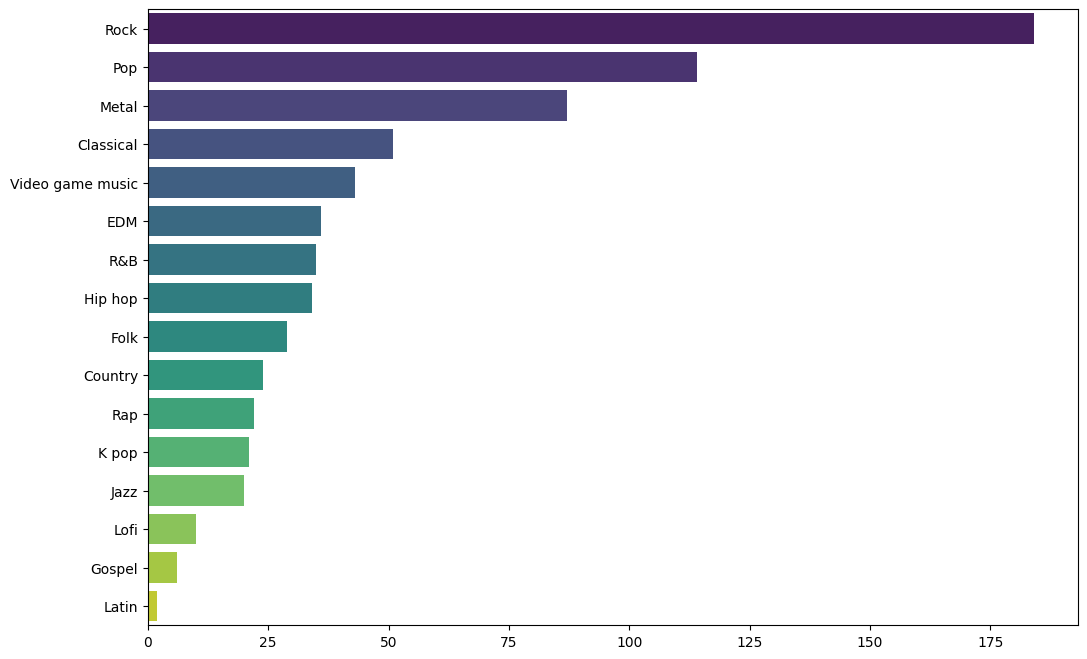

In [1107]:
plt.figure(figsize=(12, 8))
sns.barplot(data=favgenrecount, y='Fav genre', x='count', palette='viridis')
plt.ylabel('')
plt.xlabel('')
plt.show()

The majority of participants answered that Rock is their favorite genre, followed by Pop, Metal, Classical and Video game music, in the top 5. The least favorite genre is Latin, followed by Gospel, Lofi, Jazz and K-pop.

### Fav genre and Music effects

In [1108]:
df.groupby('Fav genre')['Music effects'].value_counts().reset_index()

,Fav genre,Music effects,count
0,Classical,Improve,37
1,Classical,No effect,13
2,Classical,Worsen,1
3,Country,Improve,19
4,Country,No effect,5
5,EDM,Improve,30
6,EDM,No effect,6
7,Folk,Improve,23
8,Folk,No effect,6
9,Gospel,Improve,6


Only the very minority of listeners have stated that music worsens their mental conditions. The only genres with participants who think that are: Classical, Pop, Rap, Rock and Video game music.

### Number of users by Primary Streaming Service

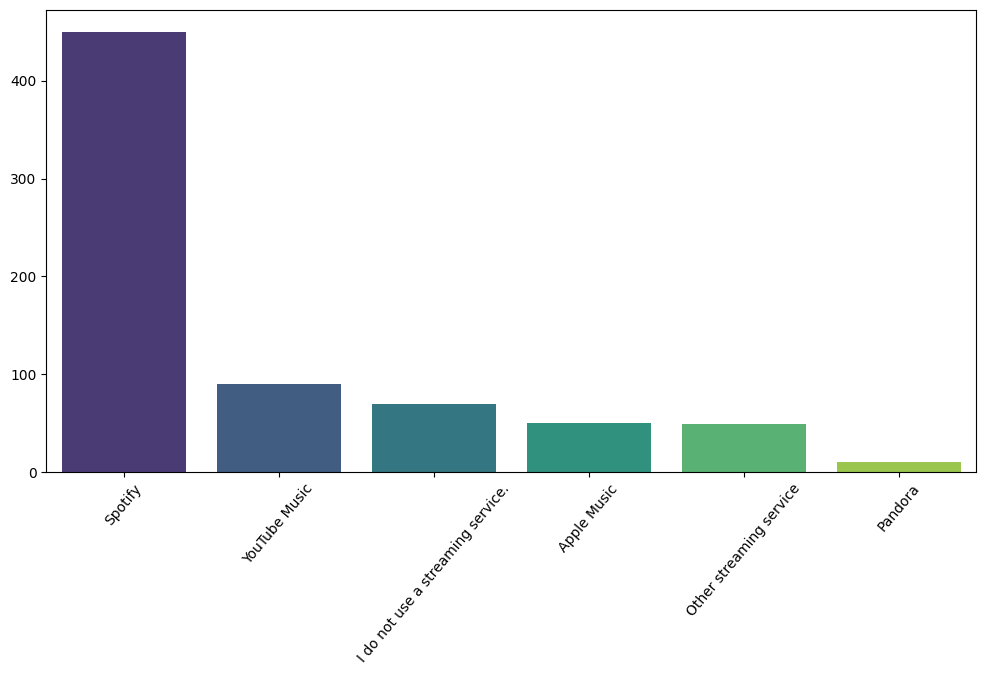

In [1109]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Primary streaming service', palette='viridis')
plt.xticks(rotation=50)
plt.ylabel('')
plt.xlabel('')
plt.show()

### While working, Exploratory, Foreign languages and Music effects percentages

In [1110]:
whileworking = df['While working'].value_counts(normalize=True)
exploratory = df['Exploratory'].value_counts(normalize=True)
foreignlanguages = df['Foreign languages'].value_counts(normalize=True)
musiceffects = df['Music effects'].value_counts(normalize=True)

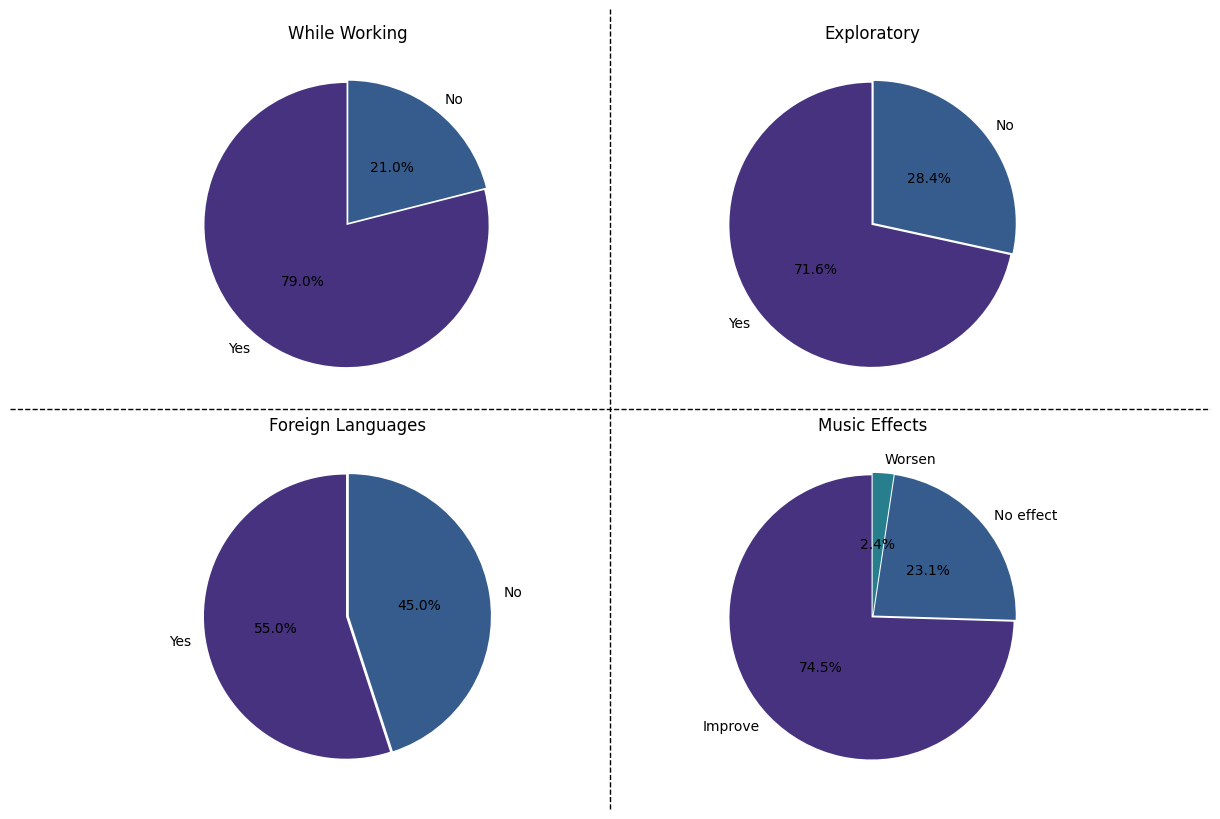

In [1111]:
from matplotlib.lines import Line2D

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Graph 1
axs[0, 0].pie(whileworking, autopct='%1.1f%%', startangle=90, labels=whileworking.index, colors=sns.color_palette("viridis"), explode=[0.01] * len(whileworking), pctdistance=0.5)
axs[0, 0].set_title("While Working")

# Graph 2
axs[0, 1].pie(exploratory, autopct='%1.1f%%', startangle=90, labels=exploratory.index, colors=sns.color_palette("viridis"), explode=[0.01] * len(exploratory), pctdistance=0.5)
axs[0, 1].set_title("Exploratory")

# Graph 3
axs[1, 0].pie(foreignlanguages, autopct='%1.1f%%', startangle=90, labels=foreignlanguages.index, colors=sns.color_palette("viridis"), explode=[0.01] * len(foreignlanguages), pctdistance=0.5)
axs[1, 0].set_title("Foreign Languages")

# Graph 4
axs[1, 1].pie(musiceffects, autopct='%1.1f%%', startangle=90, labels=musiceffects.index, colors=sns.color_palette("viridis"), explode=[0.01] * len(musiceffects), pctdistance=0.5)
axs[1, 1].set_title("Music Effects")

line_h = Line2D([0, 1], [0.5, 0.5], color="black", linewidth=1, transform=fig.transFigure, linestyle="--")
fig.add_artist(line_h)

line_v = Line2D([0.5, 0.5], [0, 1], color="black", linewidth=1, transform=fig.transFigure, linestyle="--")
fig.add_artist(line_v)

plt.tight_layout()
plt.show()

### Intrumentalist and Composer percentages

In [1112]:
intrumentalist = df['Instrumentalist'].value_counts(normalize=True)

composer = df['Composer'].value_counts(normalize=True)

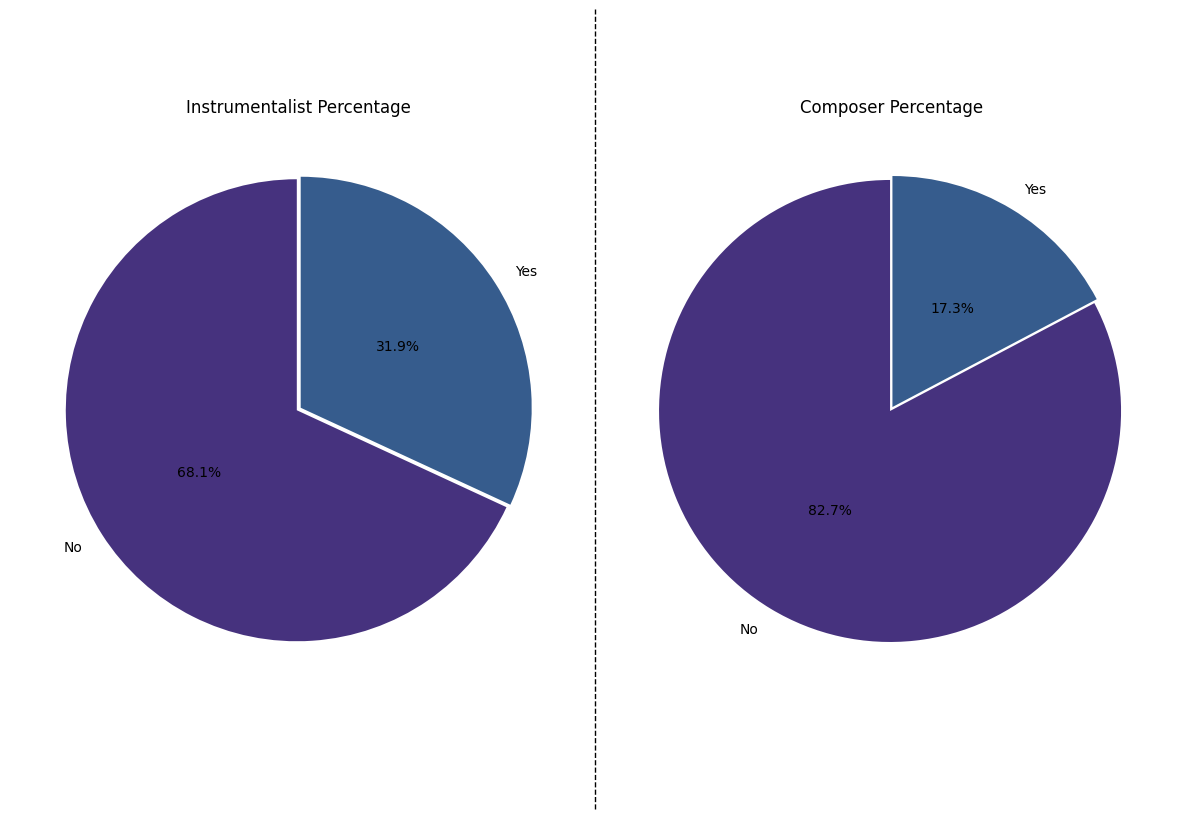

In [1113]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Graph 1
axs[0].pie( intrumentalist, autopct='%1.1f%%', startangle=90, labels=intrumentalist.index, colors=sns.color_palette("viridis"), explode=[0.01] * len(intrumentalist), pctdistance=0.5)
axs[0].set_title("Instrumentalist Percentage")

# Graph 2
axs[1].pie( composer, autopct='%1.1f%%', startangle=90, labels=composer.index, colors=sns.color_palette("viridis"), explode=[0.01] * len(composer), pctdistance=0.5)
axs[1].set_title("Composer Percentage")

line_v = Line2D([0.5, 0.5], [0, 1], color="black", linewidth=1, transform=fig.transFigure, linestyle="--")
fig.add_artist(line_v)

plt.tight_layout()
plt.show()

### Favorite genre grouped by each condition's median

In [1114]:
favgenre_by_condition = df.groupby('Fav genre')[['Anxiety', 'OCD', 'Insomnia', 'Depression']].median().reset_index()
favgenre_by_condition

,Fav genre,Anxiety,OCD,Insomnia,Depression
0,Classical,6.0,2.0,3.00,5.0
1,Country,6.5,2.0,2.00,4.5
2,EDM,6.0,2.0,4.00,5.5
3,Folk,8.0,2.0,4.00,5.0
4,Gospel,4.5,0.0,5.00,1.0
5,Hip hop,7.0,2.0,3.00,7.0
6,Jazz,6.5,2.0,3.50,4.0
7,K pop,7.0,1.0,3.00,3.0
8,Latin,5.0,2.5,4.50,4.5
9,Lofi,7.0,2.0,6.00,8.0


If we consider just these values alone, participants with Folk as their favorite genre display the highest anxiety levels of all, with a median of 8, Rap and Gospel have the lowest anxiety, with a 4.5 median. Rock, Hip Hop, K-pop, Lofi and Rock have a median of 7 anxiety. When it comes to OCD, only rap stands out with a median of 3, adn Gospel with 0, while other genres having a very similar median overall. The highest insomnia levels goes to Lofi, with a median insomnia of 6, while Gospel and Metal have a median of 5, the lowest are: R&B with 0, and K-pop and Metal with 1. As for depression, the genre with the highest median is Lofi (8), followed by Hip Hop (7), the lowest ones are Gospel (1), Rap and K-pop (3).

### Median values of each condition

In [1115]:
overall_medians = df[['Anxiety', 'OCD', 'Insomnia', 'Depression']].median()
overall_medians

Anxiety       6.0
OCD           2.0
Insomnia      3.0
Depression    5.0
dtype: float64

### Mean values of each condition

In [1116]:
overall_means = df[['Anxiety', 'OCD', 'Insomnia', 'Depression']].mean()
overall_means

Anxiety       5.837744
OCD           2.635097
Insomnia      3.717967
Depression    4.806407
dtype: float64

### Which favorite genres contain condition values over the overall median

In [1117]:
for condition in ['Anxiety', 'OCD', 'Insomnia', 'Depression']:
    favgenre_by_condition[f'{condition}_above_median'] = favgenre_by_condition[condition] > overall_medians[condition]

### Results where anxiety is above the median

In [1118]:
favgenre_by_condition['Fav genre'].loc[favgenre_by_condition['Anxiety_above_median'] == True]

1     Country
3        Folk
5     Hip hop
6        Jazz
7       K pop
9        Lofi
14       Rock
Name: Fav genre, dtype: object

### Favorite genres where OCD is above the median

In [1119]:
favgenre_by_condition['Fav genre'].loc[favgenre_by_condition['OCD_above_median'] == True]

8     Latin
13      Rap
Name: Fav genre, dtype: object

### Favorite genres where insomnia is above the median

In [1120]:
favgenre_by_condition['Fav genre'].loc[favgenre_by_condition['Insomnia_above_median'] == True]

2                  EDM
3                 Folk
4               Gospel
6                 Jazz
8                Latin
9                 Lofi
10               Metal
14                Rock
15    Video game music
Name: Fav genre, dtype: object

### Favorite genres where depression is above the median

In [1121]:
favgenre_by_condition['Fav genre'].loc[favgenre_by_condition['Depression_above_median'] == True]

2         EDM
5     Hip hop
9        Lofi
10      Metal
14       Rock
Name: Fav genre, dtype: object

### Instrumentalists conditons's means

In [1122]:
instrumentalist_by_condition = df.groupby('Instrumentalist')[['Anxiety', 'OCD', 'Insomnia', 'Depression']].mean().reset_index().round(1)
instrumentalist_by_condition

,Instrumentalist,Anxiety,OCD,Insomnia,Depression
0,No,5.8,2.6,3.7,4.8
1,Yes,6.0,2.7,3.9,4.8


### Composer conditons's means

In [1123]:
composer_by_condition = df.groupby('Composer')[['Anxiety', 'OCD', 'Insomnia', 'Depression']].mean().reset_index().round(1)
composer_by_condition

,Composer,Anxiety,OCD,Insomnia,Depression
0,No,5.8,2.6,3.6,4.7
1,Yes,5.9,2.7,4.4,5.2


### Concentration of age and hours per day

<Figure size 1000x800 with 0 Axes>

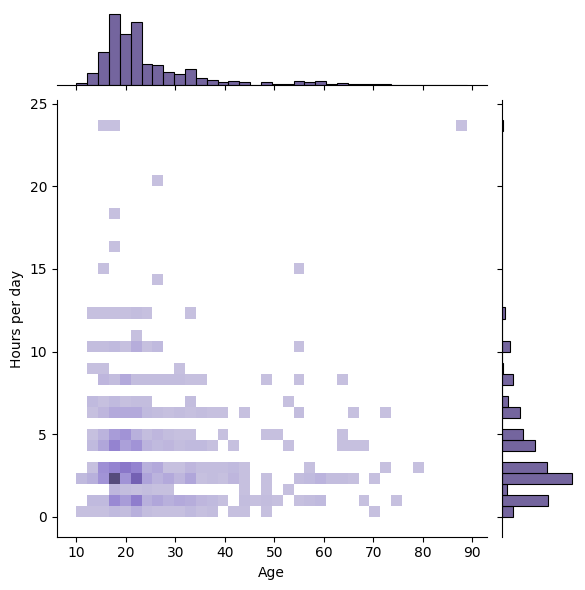

In [1124]:
plt.figure(figsize=(10, 8))
sns.jointplot(x='Age', y='Hours per day', data=df, kind='hist', kde=True, palette='viridis')
plt.show()

This graph shows that the highest concentration in hours per day is between 0-5h, and the highest concentration of age is between 14-25.

### Creating age bins

In [1125]:
df['Age group'] = pd.cut(df['Age'], bins=[9, 19, 59, 70], labels=['Teenager', 'Adult', 'Senior'])

### Total of each age group

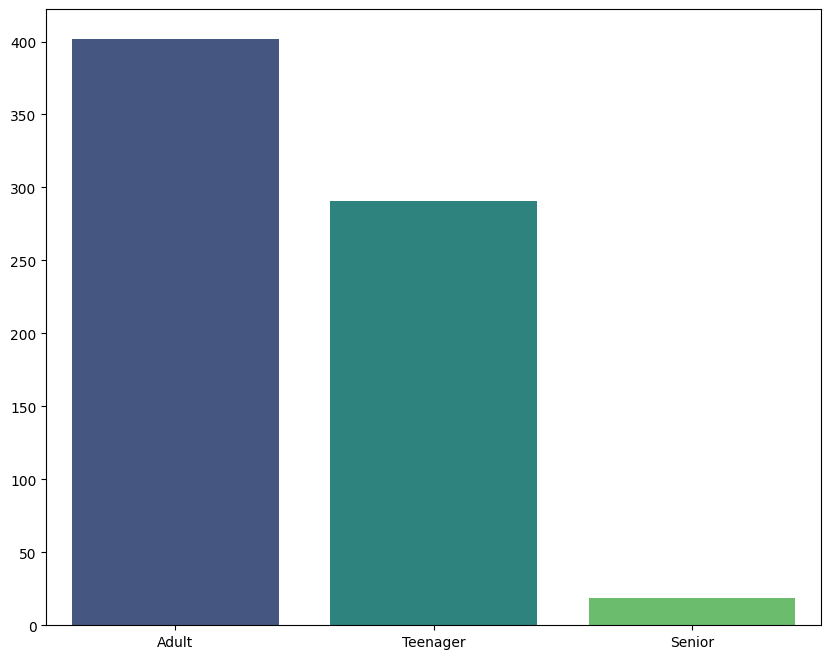

In [1126]:
agegroups = df['Age group'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=agegroups, x='Age group', y='count', order=agegroups['Age group'], palette='viridis')
plt.ylabel('')
plt.xlabel('')
plt.show()

### Age group by contitions's medians

In [1127]:
agegroups_by_condition = df.groupby('Age group')[['Anxiety', 'OCD', 'Insomnia', 'Depression']].median().reset_index()
agegroups_by_condition

,Age group,Anxiety,OCD,Insomnia,Depression
0,Teenager,6.0,2.0,3.0,5.0
1,Adult,6.0,2.0,3.0,6.0
2,Senior,5.0,0.0,2.0,4.0


Seniors have a lower median of every condition compared to the other age groups. However this could be statistically not accurate, since seniors are such a low percentage between participants, demanding hypothesis testing to see if the differences are actually relevant.

### Total primary streaming service usage by age

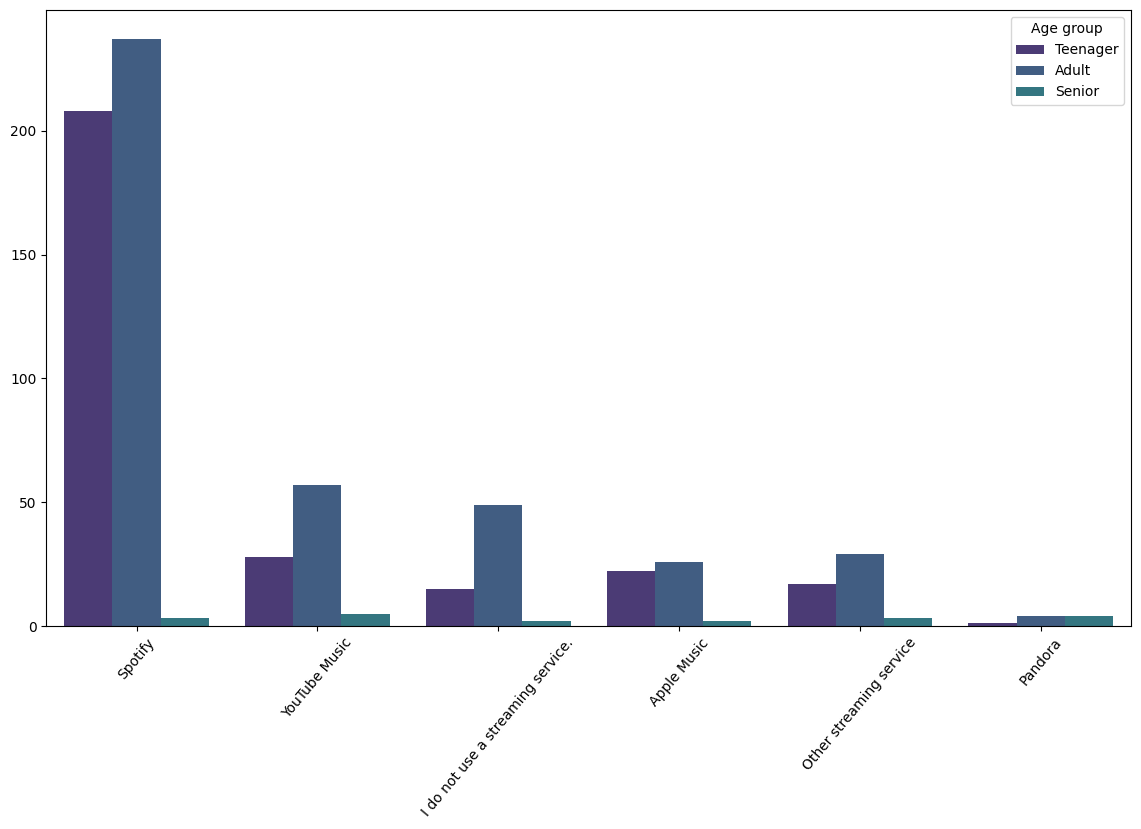

In [1128]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Primary streaming service', hue='Age group')
plt.xticks(rotation=50)
plt.ylabel('')
plt.xlabel('')
plt.show()

### Distribution of Music Genre Listening Frequencies

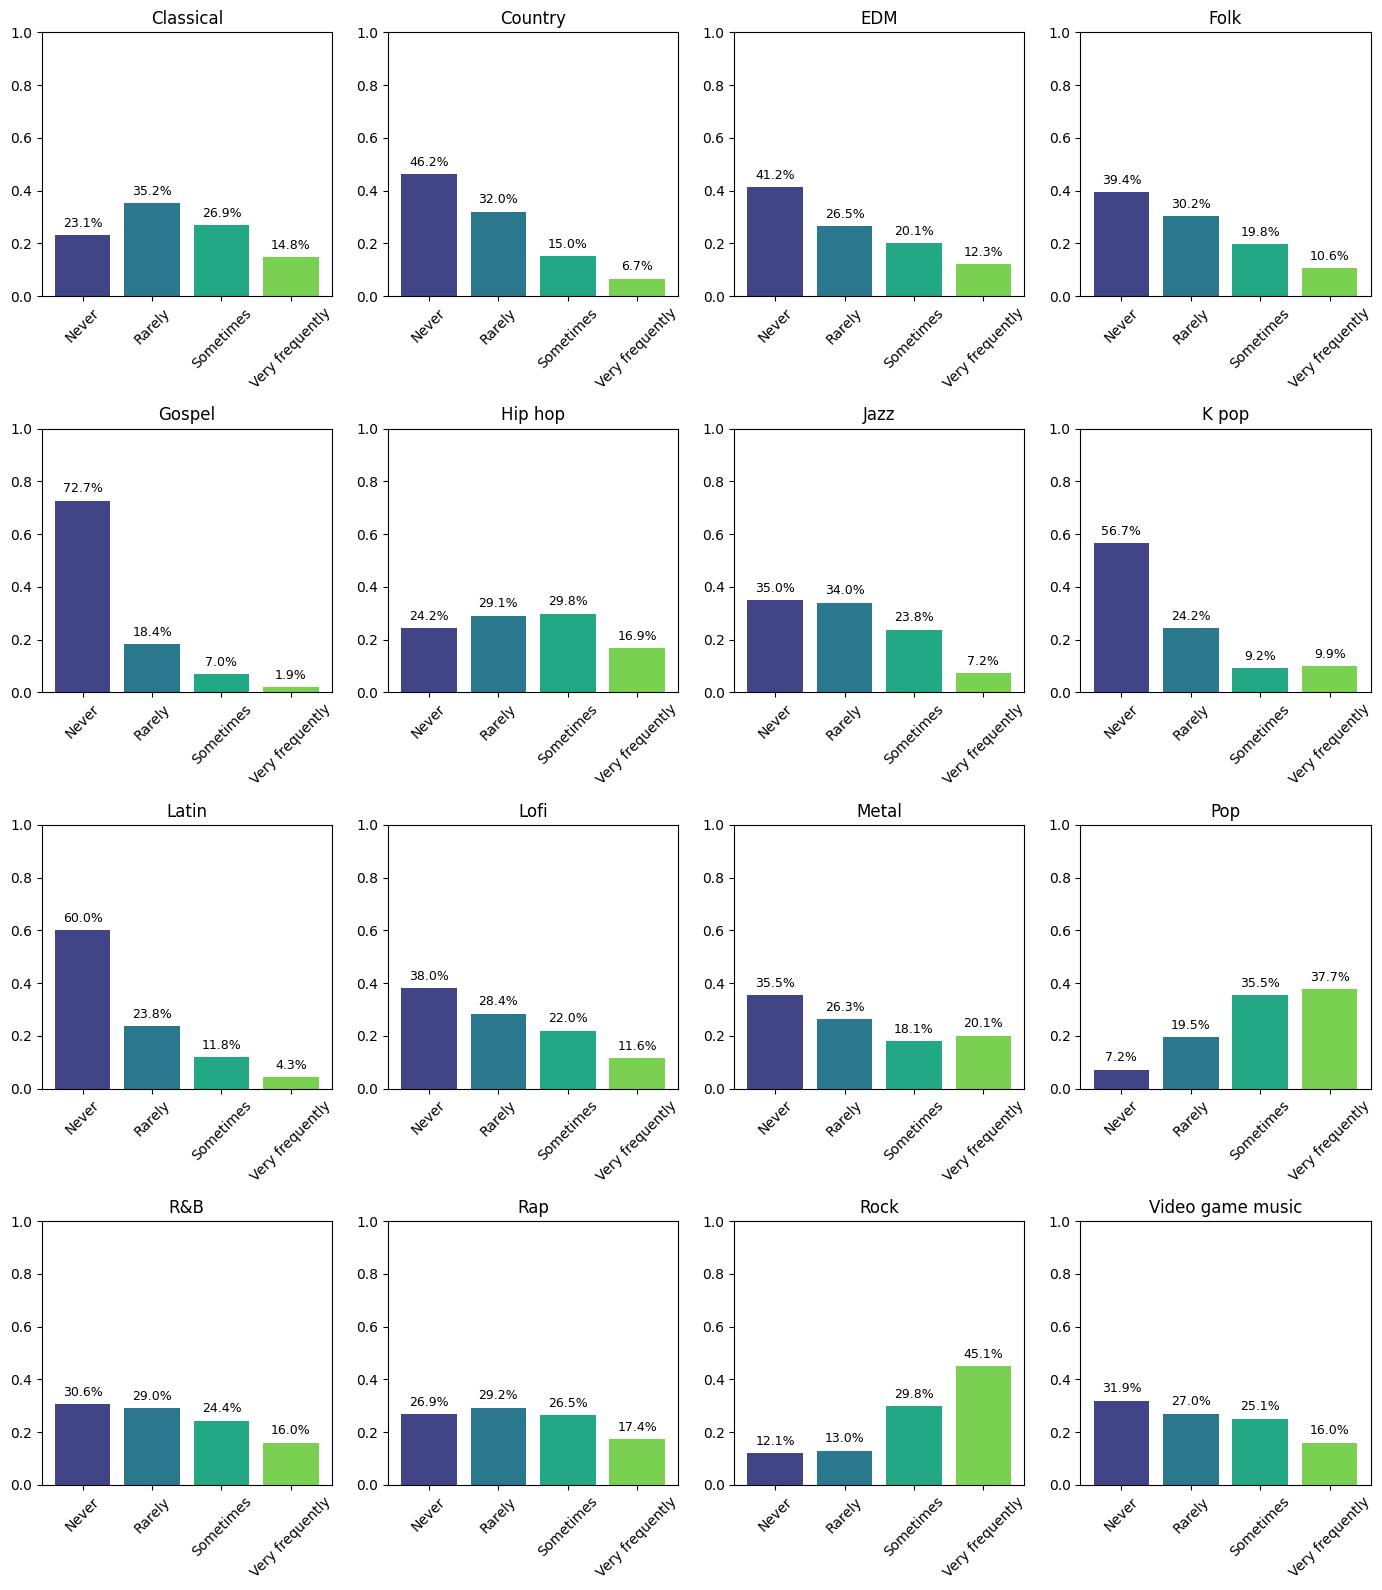

In [1129]:
genres = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music']

num_cols = len(genres)
rows = (num_cols // 4) + (num_cols % 4 > 0)  
fig, axs = plt.subplots(rows, 4, figsize=(14, rows * 4))

axs = axs.flatten()

palette = sns.color_palette("viridis", n_colors=4)

for i, genre in enumerate(genres):
    
    counts = df[genre].value_counts(normalize=True).sort_index()  
   
    bars = axs[i].bar(counts.index, counts, color=palette[:len(counts)])
    axs[i].set_title(genre)
    axs[i].set_ylim(0, 1)  
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].tick_params(axis='x', rotation=45)  

    
    for bar, value in zip(bars, counts):
        axs[i].text(
            bar.get_x() + bar.get_width() / 2,  
            bar.get_height() + 0.02,           
            f'{value:.1%}',                    
            ha='center', va='bottom', fontsize=9
        )

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

The most listened to genre is rock, with 45.1% of the participants declaring they listen to it very frequently, and only 12.1% who never listen to it. Gospel is genre that is the least listened to overall, with only 1.9% of participants who listen to it very frequently, and 72% who never listen to it, followed by latin, with 4.3% who very frequently listen to it, and 60% who never listen to it.

### Correlation between Age, Hours per day, Anxiety, Depression, Insomnia, and OCD

In [1130]:
# Setting the correlation
corr = df[['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()

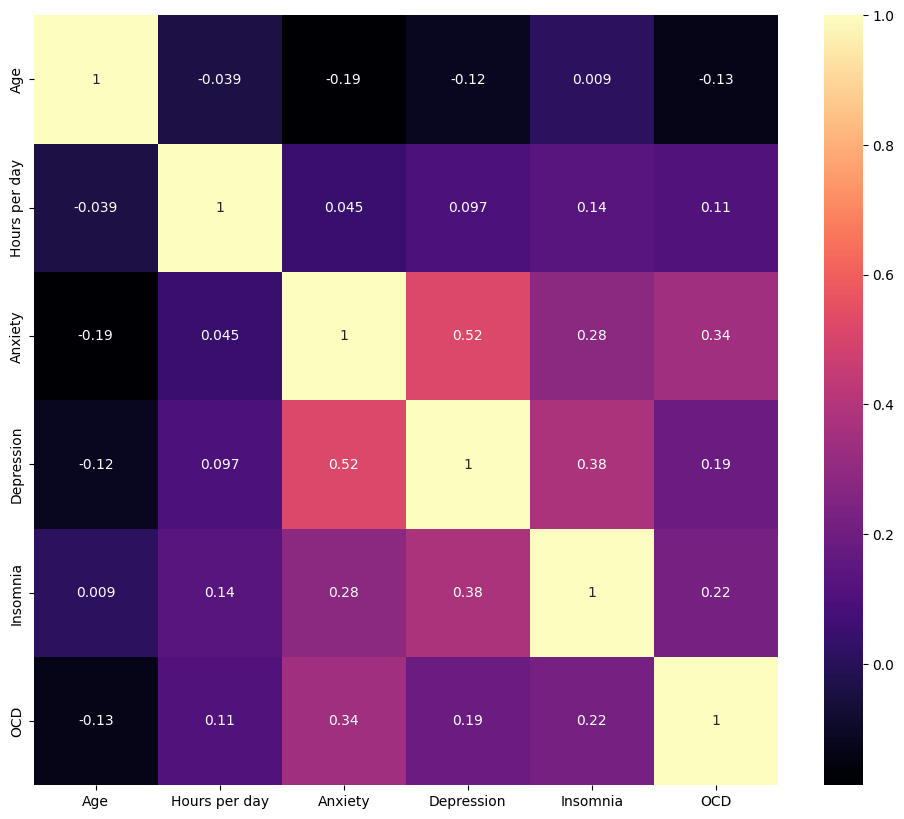

In [1131]:
# Plotting the graph
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='magma')
plt.show()

This shows that there is a correlation between depression and anxiety (0.52), depression and insomnia (0.38) anxiety and ocd (0.34), anxiety and insomnia (0.28), insomnia and OCD (0.20), and depression and OCD (0.19). This means that these variables are dependent, which changes the types of hypothesis tests we can do with the data.

### Changing categorical values to numerical

In [1132]:
# Copying the dataframe
df1 = df.copy()

In [1133]:
# Columns to change
colstochange = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music']

In [1134]:
# Mapping values
df1[colstochange] = df1[colstochange].apply(lambda x: x.map({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}))

df1['While working'] = df1['While working'].map({'Yes': 1, 'No': 0})

df1['Exploratory'] = df1['Exploratory'].map({'Yes': 1, 'No': 0})

df1['Music effects'] = df1['Music effects'].map({'Improve': 1, 'No effect': 0, 'Worsen': -1})

### Correlation between frequency and conditions

In [1135]:
# Setting the correlation
corr = df1[['Age', 'Hours per day', 'While working', 'Exploratory', 'BPM', 'Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']].corr()

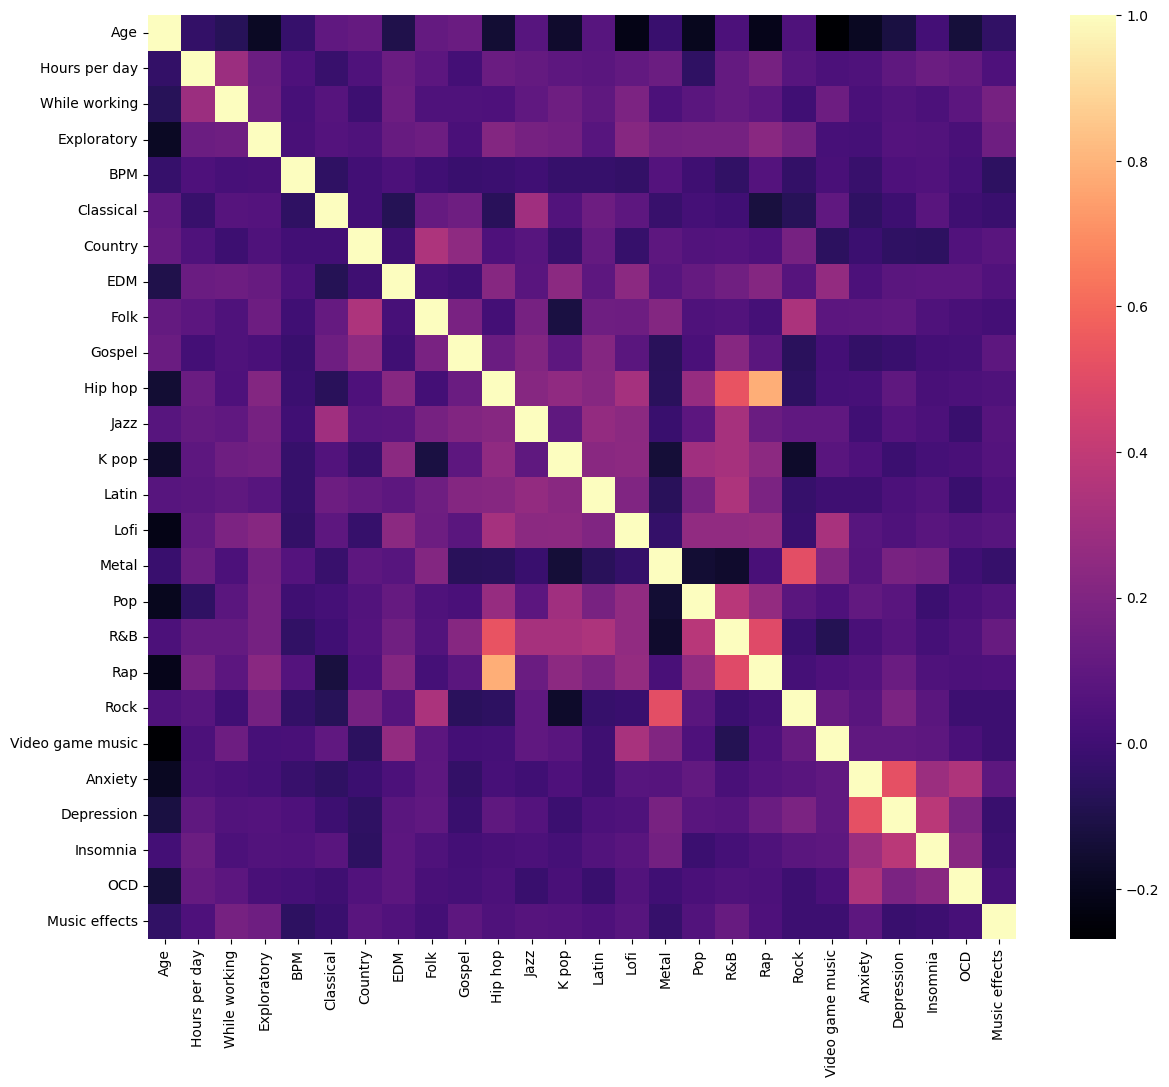

In [1136]:
# Plotting the graph
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='magma')
plt.show()

We can see that there is a strong correlation between listening to hip Hop and Rap, Hip Hop and R&B, R&B and Rap, and Rock and Metal. That makes sense since these genres can be very similar sometimes.

# 3- Statistacal Tests

### Spread of Insomnia, OCD, Depression and Anxiety

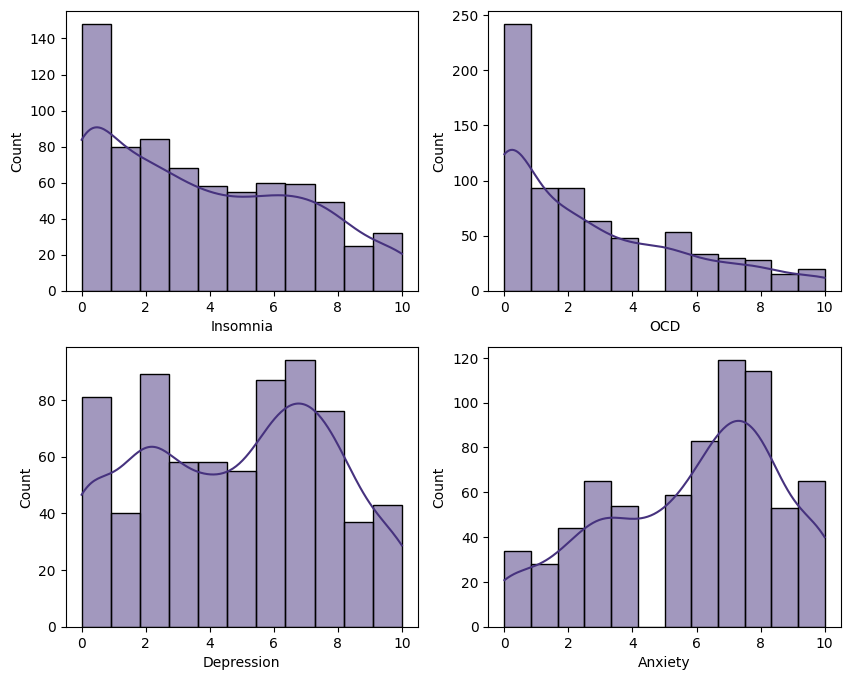

In [1137]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x='Insomnia', kde=True, ax=axs[0, 0])

sns.histplot(data=df, x='OCD', kde=True, ax=axs[0, 1])

sns.histplot(data=df, x='Depression', kde=True, ax=axs[1, 0])

sns.histplot(data=df, x='Anxiety', kde=True, ax=axs[1, 1])

plt.show()


### Normality test

In [1138]:
# Importing normality test
from scipy.stats import shapiro

In [1139]:
# Shapiro-wilk test
normality_results = []

for condition in ['Anxiety', 'OCD', 'Insomnia', 'Depression']:
    stat_shapiro, p_shapiro = shapiro(df[condition])
    
    normality_results.append({
        'Condition': condition,
        'Shapiro-Wilk Statistic': stat_shapiro,
        'Shapiro-Wilk P-Value': p_shapiro})

results_df = pd.DataFrame(normality_results)
print(results_df)

    Condition  Shapiro-Wilk Statistic  Shapiro-Wilk P-Value
0     Anxiety                0.944336          8.952367e-16
1         OCD                0.847047          9.655654e-26
2    Insomnia                0.914115          9.910828e-20
3  Depression                0.943288          6.190027e-16


Since the p-values are significantly below the significance level of 0.05, we conclude that none of the distributions follow a normal distribution. Therefore, the median is a more suitable statistic for comparison, and nonparametric tests are the appropriate choice for hypothesis testing.

### Hypothesis test

In [1140]:
# Importing mannwhitneyu test
from scipy.stats import mannwhitneyu

### Performing mannwhitneyu test

In [1141]:
results = []

for condition in ['Anxiety', 'OCD', 'Insomnia', 'Depression']:
    for genre in favgenre_by_condition['Fav genre']:
        group_values = df[df['Fav genre'] == genre][condition]
        group_median = group_values.median()  
        overall_median = overall_medians[condition]  

        # Mann-Whitney U Test for independent data
        stat_greater, p_value_greater = mannwhitneyu(group_values, [overall_median] * len(group_values), alternative='greater')
        stat_less, p_value_less = mannwhitneyu(group_values, [overall_median] * len(group_values), alternative='less')

        if p_value_greater < 0.05:
            relation = 'Greater'
        elif p_value_less < 0.05:
            relation = 'Less'
        else:
            relation = 'Equal'

        results.append({
            'Fav genre': genre,
            'Condition': condition,
            'Group Median': group_median,
            'Overall Median': overall_median,
            'Statistic Greater': stat_greater,
            'P-Value Greater': p_value_greater,
            'Statistic Less': stat_less,
            'P-Value Less': p_value_less,
            'Significant (alpha=0.05)': relation
        })

results_df = pd.DataFrame(results)

### Displaying results where the difference is statistically significant

In [1142]:
# Where the median is significantly greater than the overall median
results_df[['Fav genre', 'Condition']].loc[results_df['Significant (alpha=0.05)'] == 'Greater']

,Fav genre,Condition
3,Folk,Anxiety
11,Pop,Anxiety
14,Rock,Anxiety
29,Rap,OCD
41,Lofi,Insomnia
42,Metal,Insomnia
53,Hip hop,Depression
57,Lofi,Depression
62,Rock,Depression


In [1143]:
# Where the median is significantly less than the overall median
results_df[['Fav genre', 'Condition']].loc[results_df['Significant (alpha=0.05)'] == 'Less']

,Fav genre,Condition
20,Gospel,OCD
26,Metal,OCD
33,Country,Insomnia
45,Rap,Insomnia
52,Gospel,Depression
55,K pop,Depression
60,R&B,Depression
